**1.Data Loading and Exploration**

In [5]:
# Importing python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
# loading the dataset
df = pd.read_csv('./homeprices-m.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [18]:
# exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 324.0 bytes


In [19]:
# a statistical summary of the dataset
df.describe()

,area,bedrooms,age,price
count,6.000000,5.00000,6.000000,6.000000
mean,3416.666667,4.20000,16.500000,648333.333333
std,587.934237,1.30384,8.288546,109117.673484
min,2600.000000,3.00000,8.000000,550000.000000
25%,3050.000000,3.00000,9.750000,572500.000000
50%,3400.000000,4.00000,16.500000,602500.000000
75%,3900.000000,5.00000,19.500000,722500.000000
max,4100.000000,6.00000,30.000000,810000.000000


**2. Data Preparation**

This section will involve handling missing values if any, then split data set into training and test data set


In [20]:
# Checking the number of missing values in the dataset
df.isnull().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [7]:
# Since the bedrooms has a missing value we will input the median value of the bedrooms column
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())


In [22]:
# The new dataset after imputing the missing values
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


**3. Simple Linear Regression**

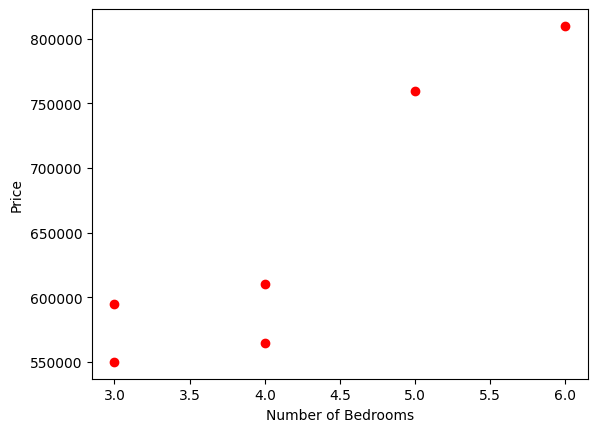

In [8]:
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.scatter(df.bedrooms, df.price, color='red', marker='o')

In [ ]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


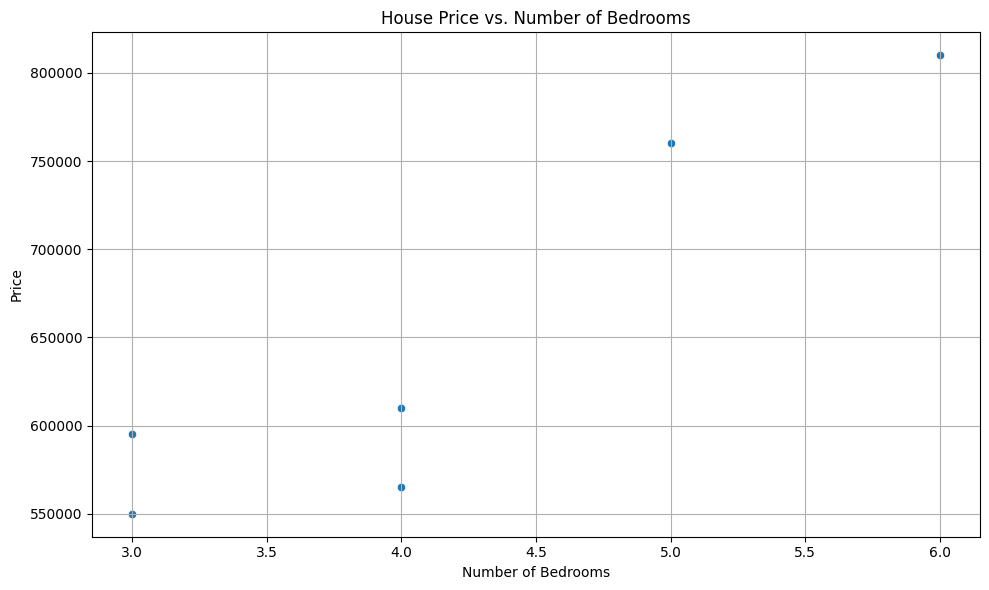

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.title('House Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.savefig('house_price_vs_bedrooms_scatter_plot.png')
plt.show()

In [11]:
xvals = df['bedrooms']
xvals

0    3.0
1    4.0
2    4.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

In [12]:
yvals = df['price']
yvals

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [13]:
# Creating a linear regression model object
mymodel = linear_model.LinearRegression()
mymodel.fit(xvals.values.reshape(-1, 1), yvals)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
# predicting the price of a house with 3 bedrooms
predicted_price = mymodel.predict([[3]])
print(f"The predicted price of a house with 3 bedrooms is: {predicted_price[0]:,.2f}")

The predicted price of a house with 3 bedrooms is: 548,170.73


In [40]:
# Splitting the data into training and testing sets(80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(xvals.values.reshape(-1, 1), yvals, test_size=0.2, random_state=42)
print("\nShape of X_train:", X_train.shape)
print("\nShape of X_test:", X_test.shape)
print("\nShape of y_train:", y_train.shape)
print("\nShape of y_test:", y_test.shape)


Shape of X_train: (4, 1)

Shape of X_test: (2, 1)

Shape of y_train: (4,)

Shape of y_test: (2,)


In [ ]:
# making a prediction
y_pred = mymodel.predict(X_test)


Predicted values: [548170.73170732 634024.3902439 ]


**4. Evaluating the Model**

Use metrics like MAE, MSE, RMSE, and R² Score


In [43]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 35426.83
Mean Squared Error (MSE): 2383856335.51
Root Mean Squared Error (RMSE): 48824.75
R² Score: -41.38


**5.Visualize the results**

Plot the regression line against the actual data


In [51]:
# Visualizing the results
# Plot the regression line against the actual data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data= df, label='Actual Data')
# Plotting the regression line over the range of bedrooms for better visualization
min_bedrooms = df['bedrooms'].min()
max_bedrooms = df['bedrooms'].max()
X_plot = pd.DataFrame({'bedrooms': np.linspace(min_bedrooms, max_bedrooms, 100)})
y_plot = mymodel.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', label='Regression Line')
plt.title('Linear Regression: House Price Prediction based on Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('linear_regression_bedrooms_prediction_updated.png')
plt.close()


c:\Users\nziok\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
